Assignment 3 : IBM-Project-9130-1658982501

Problem Statement: Abalone Age Prediction

Description :
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Importing Modules

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1. Dataset has been downloaded

In [8]:
#Name of the dataset: abalone.csv

2. Load the dataset into the tool

In [9]:
data=pd.read_csv(r"https://raw.githubusercontent.com/bbrandom91/Abalone-Age-Prediction/master/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
data.shape

(4177, 9)

One additional task is that, we have to add the "Age" column using "Rings" data. We just have to add '1.5' to the ring data

In [11]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


3. Perform Below Visualizations.

(i) Univariate Analysis

The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.” There are three common ways to perform univariate analysis on one variable: 1. Summary statistics – Measures the center and spread of values.

Histogram

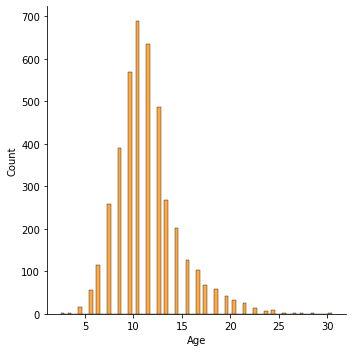

In [12]:
sns.displot(data["Age"], color='darkorange')

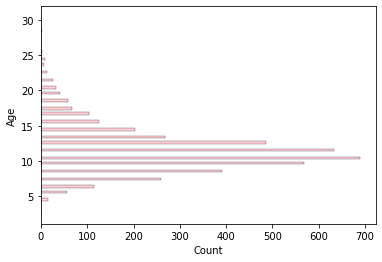

In [13]:
sns.histplot(y=data.Age,color='pink') 

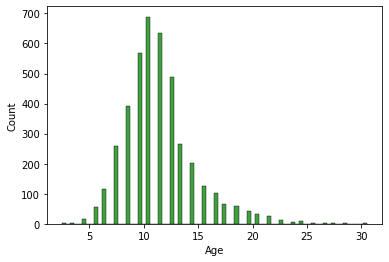

In [14]:
sns.histplot(x=data.Age,color='green') 

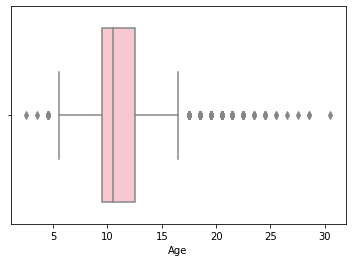

In [15]:
sns.boxplot(x=data.Age,color='pink') 

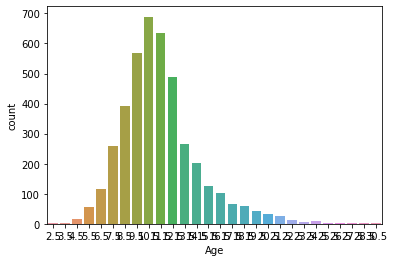

In [16]:
sns.countplot(x=data.Age) 

(ii) Bi-Variate Analysis

Image result for bivariate analysis in python It is a methodical statistical technique applied to a pair of variables (features/ attributes) of data to determine the empirical relationship between them. In order words, it is meant to determine any concurrent relations (usually over and above a simple correlation analysis).


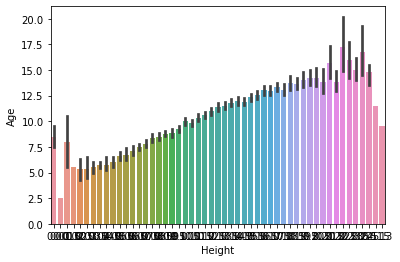

In [17]:
sns.barplot(x=data.Height,y=data.Age)

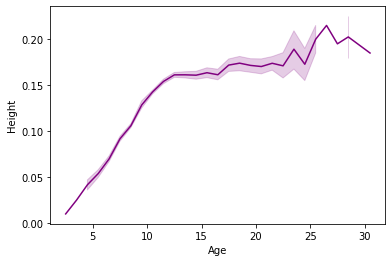

In [18]:
sns.lineplot(x=data.Age,y=data.Height, color='purple')

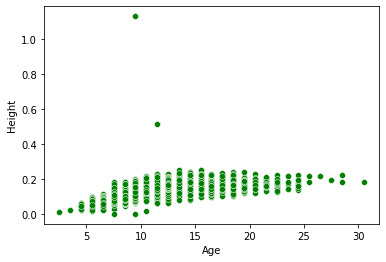

In [19]:
sns.scatterplot(x=data.Age,y=data.Height,color='green')

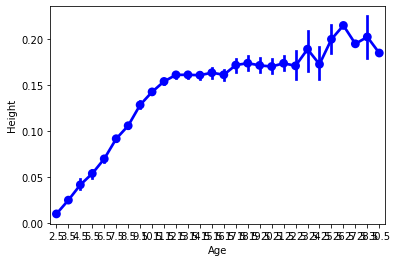

In [20]:
sns.pointplot(x=data.Age, y=data.Height, color="blue") 

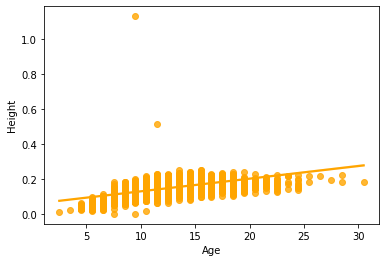

In [21]:
sns.regplot(x=data.Age,y=data.Height,color='orange') 

4. Perform descriptive statistics on the dataset

In [23]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


5. Check for Missing values and deal with them

In [24]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_Weight      0
Shucked_Weight    0
Viscera_Weight    0
SHell_Weight      0
Age               0
dtype: int64

6. Find the outliers and replace them outliers

In [25]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [26]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_Weight       0.7995
Shucked_Weight     0.3360
Viscera_Weight     0.1710
SHell_Weight       0.2340
Age               10.5000
dtype: float64

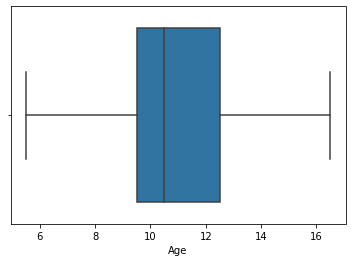

In [28]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

7. Check for Categorical columns and perform encoding

In [29]:
data.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [30]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)

data.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


8. Split the data into dependent and independent variables

In [31]:
y = data["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64

In [32]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


9. Scale the independent variables


In [33]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


10. Split the data into training and testing set

In [34]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [35]:
X_Train.shape,X_Test.shape

((3341, 8), (836, 8))

In [36]:
Y_Train.shape,Y_Test.shape

((3341,), (836,))

In [37]:
X_Train.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.543234
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-1.387181
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.577830
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.017298
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.265723


In [38]:
X_Test.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Age
668,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940,0.953617
1580,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,-0.606915
3784,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209,0.329404
463,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,-1.543234
2615,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287,0.641511


In [39]:
Y_Train.head()

3141    1
3521    1
883     2
3627    2
2106    2
Name: Sex, dtype: int64

In [40]:
Y_Test.head()

668     2
1580    1
3784    2
463     1
2615    2
Name: Sex, dtype: int64

11. Build the Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

12. Train the Model

In [42]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [43]:
y_predict = model.predict(X_Test)

In [44]:
y_predict_train = model.predict(X_Train)


13.Test the Model

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.9832385513319365


In [46]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5263157894736842


14. Measure the performance using Metrics

In [47]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,111,24,114
1,40,216,35
2,122,61,113


In [48]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43       249
           1       0.72      0.74      0.73       291
           2       0.43      0.38      0.41       296

    accuracy                           0.53       836
   macro avg       0.52      0.52      0.52       836
weighted avg       0.52      0.53      0.52       836

